# Project 1 - Visualization and Data Preprocessing

## Team Members:

#### 1. Oscar Padilla
#### 2. Najeeb Zaidi
#### 3. Harry Bhasin

### Data Set Description
#### Caterpillar builds large earth moving machines for constructions and mining. Each machine comprises of several smaller componenents including tubes to help keep the moving parts moving. There are two tube assemblies that come in a number of dimentions with several base materials, number of bends, bend radius, bolt patterns, and end types. Our team decided to use tubing data set for this project, predicting the price a supplier will quote for a given assembly.
#### The goal from the following section is to interrogate various contributing factors in the assembly, the structure/bend/dimension factor of each tube, sub components, vendor, and the pricing per quantity. The result of this section will produce a single data set with relevant attributes both continuous and categorical.
#### In an effort to create a single data set from several different data files SQL was used to do a join before further formatting the data. The outcome is a single data set consisting of approximately 30K records with 32 columns. This columns with different variable names are described below.
#### tube_assembly_id: This variable is to identify the tube.
#### supplier: This variable holds the vendor's identification number.
#### quote_date: This variable has the date of the quote. The formatting was done to this variable.
#### annual_usage: This variable is tied to the date of the quote and stores the usage.
#### min_order_quantity: This variable is tied to the price as the quantity is used for pricing.
#### bracket_pricing: This variable holds the pricing with or without bracket.
#### quantity: The cost is given assuming purchase of quantity of tubes.
#### cost tube_assembly: This variable holds the price based on the quantity ordered.
#### spec1 - spec10: These variables hold the unique specifications with respective codes for the tube assembly.
#### material_id: This variable holds the code for the material.
#### diameter: This variable holds the diameter of the ordered tube.
#### wall: This variable holds the thickness of the tube wall.
#### length: This variable holds the length of the tube.
#### num_bends: The variable holds the number of bends in a given tube assembly.
#### bend_radius: This varibale holds the radius of the respected bend.
#### end_a_1x, end_a_2x, end_x_1x, end_x_2x, end_a, end_x: These varibales hold the code for the shape of different ends of the tube.
#### num_boss: This variable holds the quantity of boss.
#### num_bracket: This variable holds the number of brackets in a given tube.

#### Tube Assemblies are made of multiple parts. The main piece is the tube which has a specific diameter, wall thickness, length, number of bends and bend radius. Either end of the tube (End A or End X) typically has some form of end connection allowing the tube assembly to attach to other features. Special tooling is typically required for short end straight lengths (end_a_1x, end_a_2x refer to if the end length is less than 1 times or 2 times the tube diameter, respectively). Other components can be permanently attached to a tube such as bosses, brackets or other custom features.
#### Prices can be quoted in 2 ways: bracket and non-bracket pricing. Bracket pricing has multiple levels of purchase based on quantity (in other words, the cost is given assuming a purchase of quantity tubes). Non-bracket pricing has a minimum order amount (min_order) for which the price would apply. Each quote is issued with an annual_usage, an estimate of how many tube assemblies will be purchased in a given year.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit


In [3]:
df = pd.read_csv('train_set.csv')

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5]), <a list of 13 Text xticklabel objects>)

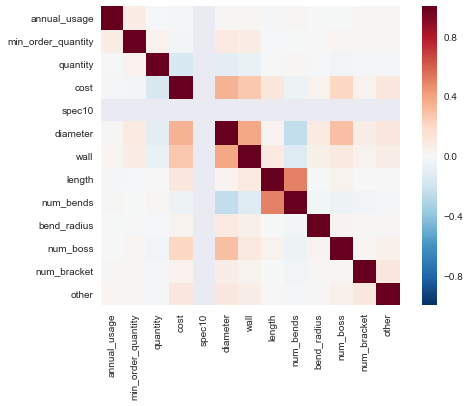

In [4]:
# lets examine the data set and correlation between the variables as-is without cleaning and formatting it
cm = df.corr()
sns.heatmap(cm, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [5]:
df['quote_date'] = pd.to_datetime(df['quote_date'],format="%Y-%m-%d")
df = df.replace("Y", 1)
df = df.replace("N", 0)
df = df.replace("Yes", 1)
df = df.replace("No", 0)
del df['tube_assembly']
del df['tube_assembly.1']
del df['spec10']

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5]),
 <a list of 17 Text xticklabel objects>)

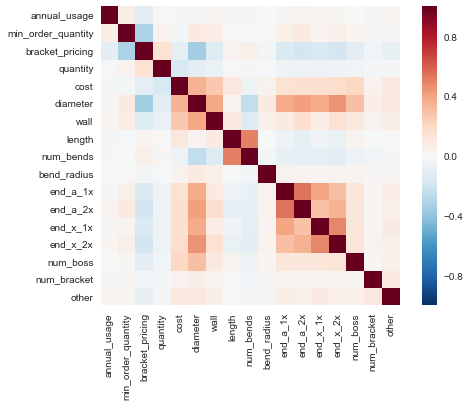

In [6]:
# lets examine the data set and correlation between the variables after cleaning and formatting it
cm = df.corr()
sns.heatmap(cm, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [7]:
df['bracket_pricing']=df['bracket_pricing'].astype('bool')
df['end_a_1x']=df['end_a_1x'].astype('bool')
df['end_a_2x']=df['end_a_2x'].astype('bool')
df['end_x_1x']=df['end_x_1x'].astype('bool')
df['end_x_2x']=df['end_x_2x'].astype('bool')

continuous_features = ['cost', 'diameter', 'wall', 'length', 'bend_radius']
categ_features = ['tube_assembly_id', 'supplier', 'spec1', 'spec2', 'spec3', 'spec4', 'spec5', 'spec6', 'spec7', 'spec8', 'spec9', 'material_id','end_a', 'end_x']
boolean_features = ['bracket_pricing','end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x']
integer_features = ['annual_usage', 'quantity', 'min_order_quantity', 'num_bends', 'num_boss', 'num_bracket', 'other']

df[integer_features] = df[integer_features].astype(np.int64)


In [8]:
print(df.info())
print df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30213 entries, 0 to 30212
Data columns (total 32 columns):
tube_assembly_id      30213 non-null object
supplier              30213 non-null object
quote_date            30213 non-null datetime64[ns]
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null bool
quantity              30213 non-null int64
cost                  30213 non-null float64
spec1                 5797 non-null object
spec2                 5551 non-null object
spec3                 4650 non-null object
spec4                 3336 non-null object
spec5                 2312 non-null object
spec6                 1687 non-null object
spec7                 306 non-null object
spec8                 56 non-null object
spec9                 4 non-null object
material_id           29984 non-null object
diameter              30213 non-null float64
wall                  30213 non-null float64
length              

In [10]:
df.describe()

,annual_usage,min_order_quantity,quantity,cost,diameter,wall,length,num_bends,bend_radius,num_boss,num_bracket,other
count,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000,30213.000000
mean,120.369377,2.084699,38.389369,13.433317,17.223018,1.384782,97.647605,3.813061,42.231223,0.025254,0.003542,0.013603
std,1590.331872,12.742776,70.761392,28.663200,18.125973,0.638610,63.230131,2.199564,200.313458,0.184975,0.069664,0.150840
min,0.000000,0.000000,1.000000,0.503553,3.180000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,3.878190,9.520000,0.890000,48.000000,2.000000,19.050000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,10.000000,6.521146,12.700000,1.240000,86.000000,3.000000,31.750000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,40.000000,13.431781,19.050000,1.650000,133.000000,5.000000,50.800000,0.000000,0.000000,0.000000
max,150000.000000,535.000000,2500.000000,1000.000000,203.200000,7.900000,1333.000000,17.000000,9999.000000,5.000000,3.000000,8.000000
